## MEMBUAT MODEL PREDIKSI PENYEWAAN JUMLAH SEPEDA HARIAN DENGAN MENGGUNAKAN REGRESI LINIER

# Regresi

*supervised* adalah teknik machine learning melibatkan pelatihan model untuk beroperasi pada sekumpulan *fitur* dan memprediksi *label* menggunakan himpunan data yang mencakup beberapa nilai label yang sudah diketahui. Proses pelatihan *menyesuaikan* fitur dengan label yang diketahui untuk menentukan fungsi umum yang dapat diterapkan pada fitur baru yang labelnya tidak diketahui dan memprediksinya. Kita dapat memikirkan fungsi ini seperti ini, di mana ***y*** mewakili label yang ingin kita prediksi dan ***x*** mewakili fitur yang digunakan model untuk memprediksinya.

$$y = f(x)$$

Dalam kebanyakan kasus, *x* sebenarnya adalah *vektor* yang terdiri dari beberapa nilai fitur. Fungsinya dapat diperjelas menjadi seperti ini:

$$y = f([x_1, x_2, x_3, ...]) $$

> **Catatan**: Data yang digunakan dalam latihan ini berasal dari [Capital Bikeshare](https://www.capitalbikeshare.com/system-data) dan digunakan sesuai dengan [license agreement](https://www.capitalbikeshare.com/data-license-agreement) yang dipublikasikan.

## Memuat Data
Langkah pertama dalam setiap proyek machine learning adalah memuat data yang akan kita gunakan untuk melatih model. Tujuan dari eksplorasi ini adalah untuk mencoba memahami hubungan antara atribut-atributnya; Secara khusus, setiap korelasi yang jelas antara *fitur* dan *label* yang akan coba diprediksi oleh model yang kita buat. Hal yang akan kita lakukan pada tahap awal adalah mendeteksi dan memperbaiki masalah dalam data (seperti berurusan dengan nilai yang hilang, kesalahan, atau nilai outlier), menurunkan kolom fitur baru dengan mengubah atau menggabungkan fitur yang ada (proses yang dikenal sebagai *rekayasa fitur*), *menormalkan* fitur numerik (nilai yang dapat kita ukur atau hitung) sehingga berada pada skala yang sama, dan *encoding* fitur kategoris (nilai yang mewakili kategori diskrit) sebagai indikator numerik.

Mari kita mulai dengan memuat data berbagi sepeda sebagai **pandas** DataFrame dan melihat beberapa baris pertama.

In [32]:
import pandas as pd

# Memuat training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data.head()

--2022-10-24 10:08:09--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48800 (48K) [text/plain]
Saving to: 'daily-bike-share.csv.6'

     0K .......... .......... .......... .......... .......   100% 13,3K=3,6s

2022-10-24 10:08:15 (13,3 KB/s) - 'daily-bike-share.csv.6' saved [48800/48800]



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


Oke, mari kita mulai analisis data kita dengan memeriksa beberapa statistik deskriptif utama. Kita dapat menggunakan metode dataframe **describe** untuk menghasilkan ini untuk fitur numerik serta kolom label **rentals**.

In [34]:
# analisis menggunakan statistika deskriptif pada bagian temp, atemp, hum, windspeed, & rentals
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
bike_data[numeric_features + ['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


Statistika deskriptif mengungkapkan beberapa informasi tentang distribusi data di masing-masing bidang numerik, termasuk jumlah pengamatan (ada 731 catatan), rata-rata, simpangan baku, nilai minimum dan maksimum, dan nilai kuartil (nilai ambang batas untuk 25%, 50% - yang juga merupakan median, dan 75% dari data). Dari sini, kita dapat melihat bahwa jumlah rata-rata sewa harian adalah sekitar 848; tetapi ada standar deviasi yang relatif besar, menunjukkan banyak perbedaan dalam jumlah sewa per hari.

Kita mungkin mendapatkan gambaran yang lebih jelas tentang distribusi nilai sewa dengan memvisualisasikan data. Jenis plot umum untuk memvisualisasikan distribusi data numerik adalah histogram dan plot kotak, jadi mari kita gunakan Library matplotlib Python untuk membuat salah satu dari masing-masing untuk kolom rental.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2712\2416096785.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


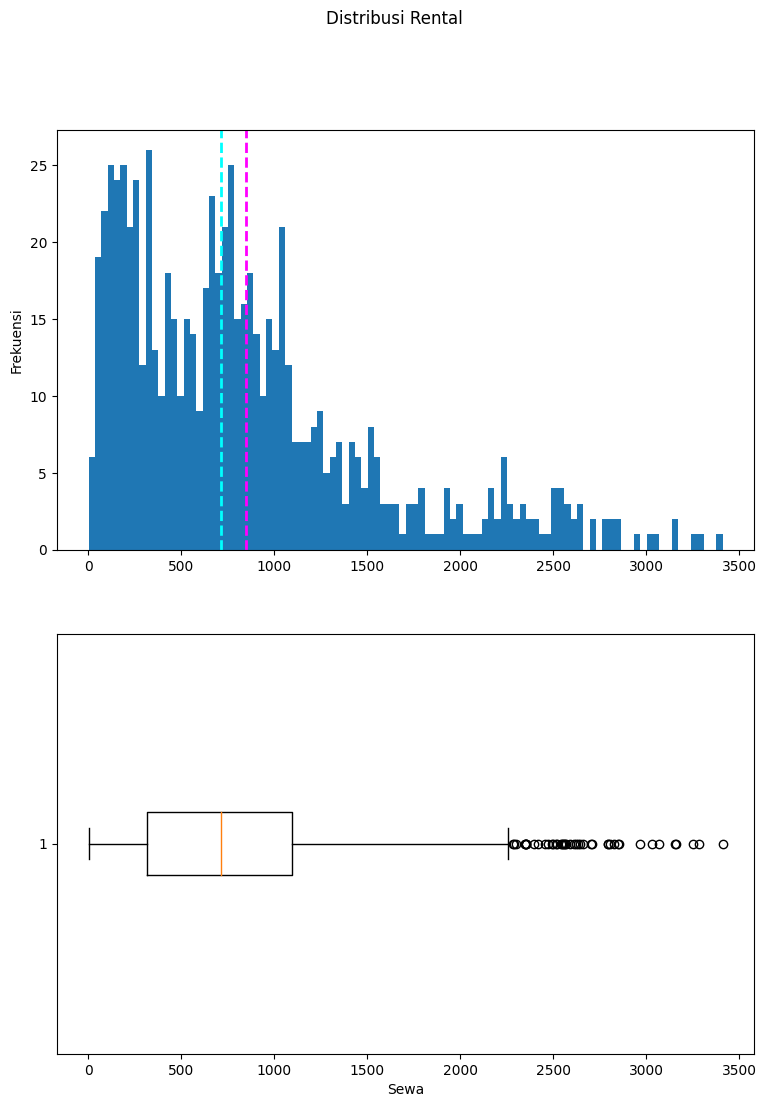

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Ini memastikan plot ditampilkan sebaris di notebook Jupyter
%matplotlib inline

# Dapatkan kolom label
label = bike_data['rentals']

# Buat gambar untuk 2 subplot (2 baris, 1 kolom)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frekuensi')

# Tambahkan garis untuk mean, median, dan mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Sewa')

# Tambahkan judul ke Gambar
fig.suptitle('Distribusi Rental')

# Tampilkan gambarnya
fig.show()

Plot menunjukkan bahwa jumlah sewa harian berkisar dari 0 hingga lebih dari 3,400. **Namun**, jumlah rata-rata (dan median) sewa harian **lebih dekat ke batas bawah kisaran**, dengan sebagian besar data antara 0 dan sekitar 2,200 sewa. Beberapa nilai di atas ini ditunjukkan dalam plot kotak sebagai lingkaran kecil, menunjukkan bahwa mereka adalah **outlier** - dengan kata lain, nilai yang luar biasa tinggi atau rendah di luar rentang khas sebagian besar data.

Kita dapat melakukan eksplorasi visual yang sama dari fitur numerik. Mari kita buat histogram untuk masing-masing.

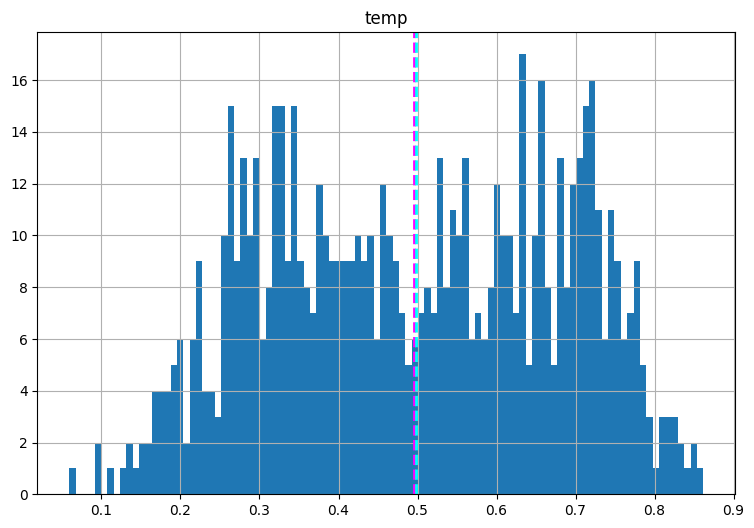

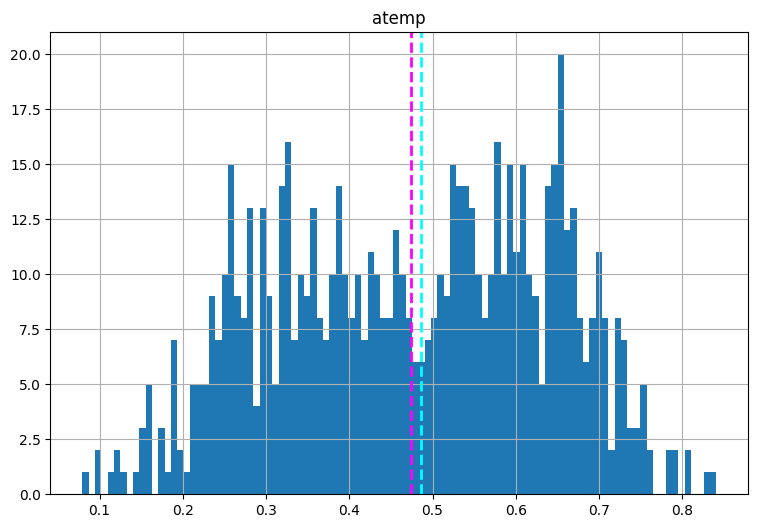

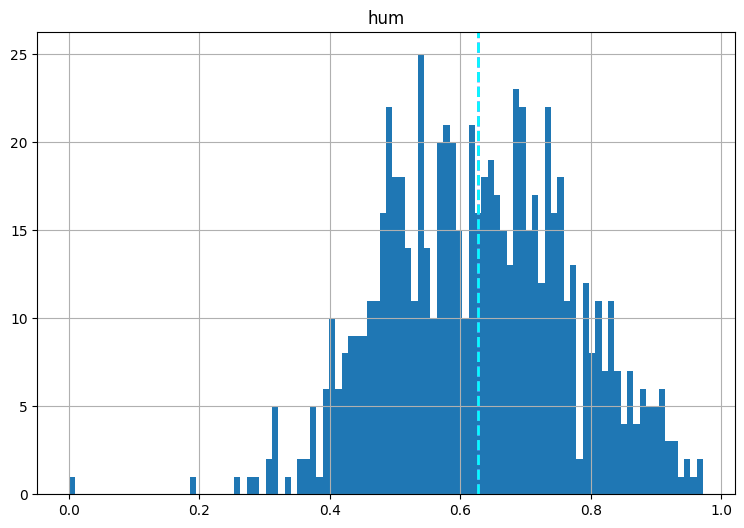

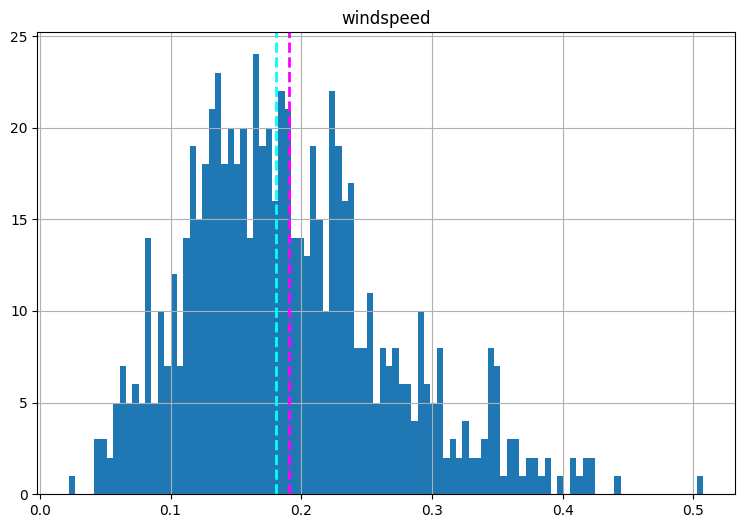

In [36]:
# Plot histogram untuk setiap fitur numerik
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

Fitur numerik tampaknya lebih terdistribusi secara "normal", dengan rata-rata dan median lebih dekat di tengah rentang nilai, bertepatan dengan di mana nilai yang paling umum terjadi.

> **Catatan**: Distribusi tidak benar-benar normal dalam arti statistik di mana menghasilkan histogram berbentuk "kurva lonceng" simetris yang halus dengan rata-rata dan mode (nilai paling umum) di tengah; tetapi umumnya menunjukkan bahwa sebagian besar pengamatan memiliki nilai tengah.

Kita telah memuat distribusi nilai numerik dalam himpunan data, tetapi bagaimana dengan fitur kategorisnya? disebabkan data-data ini bukanlah angka yang kontinu dalam skala atau memiliki nilai yang sudah ditetapkan sehingga kita tidak dapat menggunakan histogram untuk memvisualisasikannya. Maka kita dapat memplot diagram batang yang menunjukkan jumlah setiap nilai diskrit untuk setiap kategori.

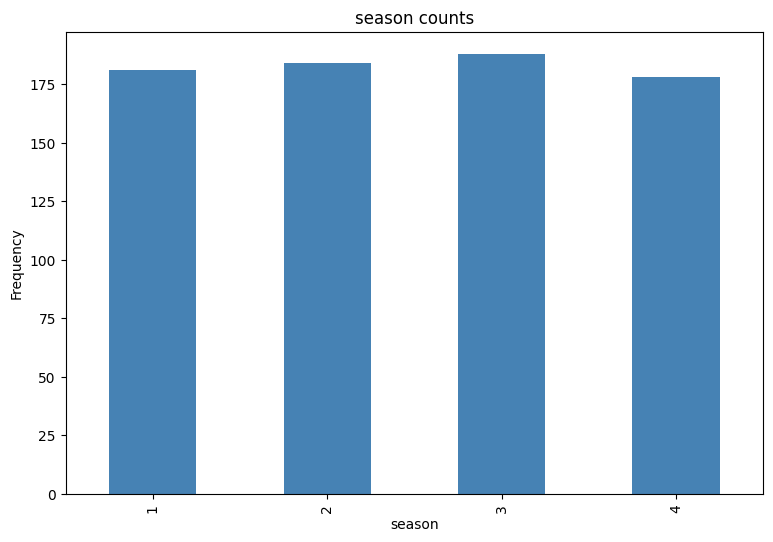

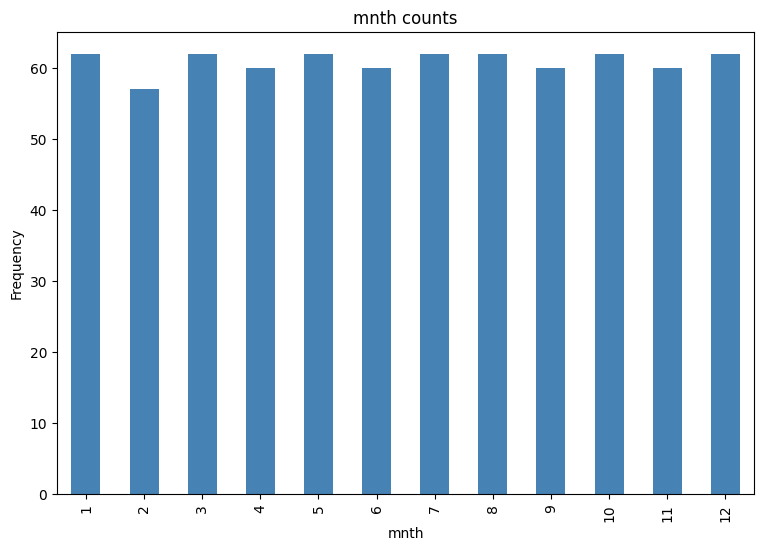

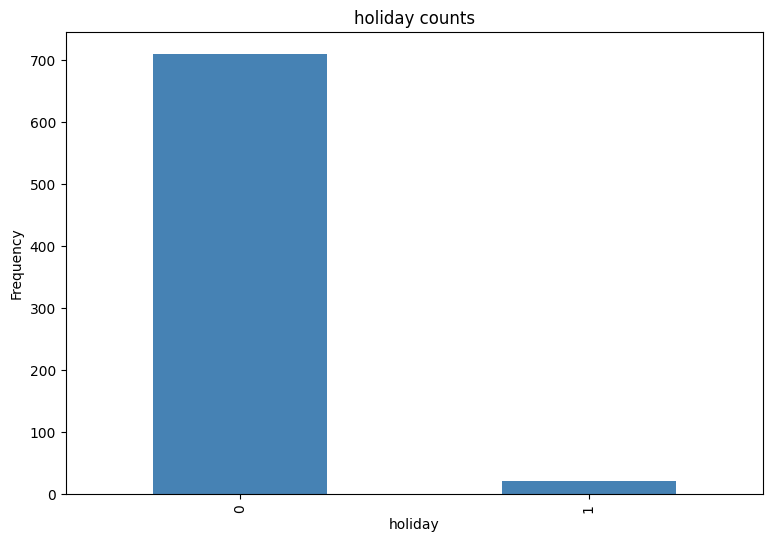

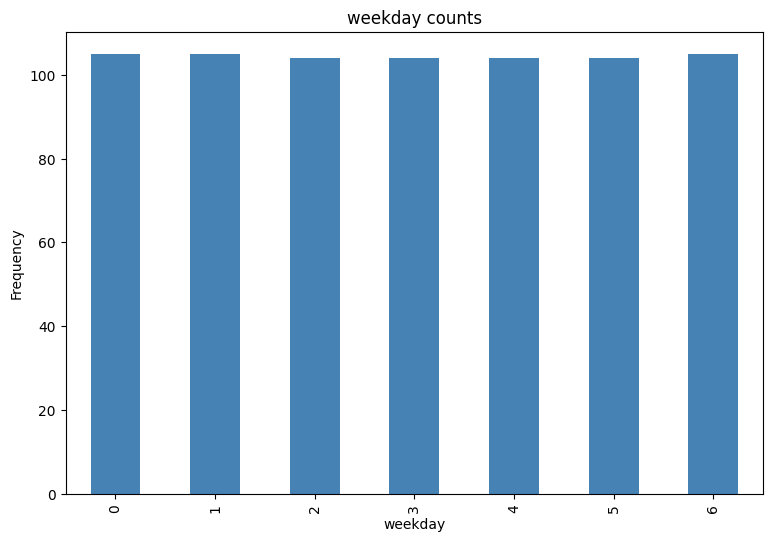

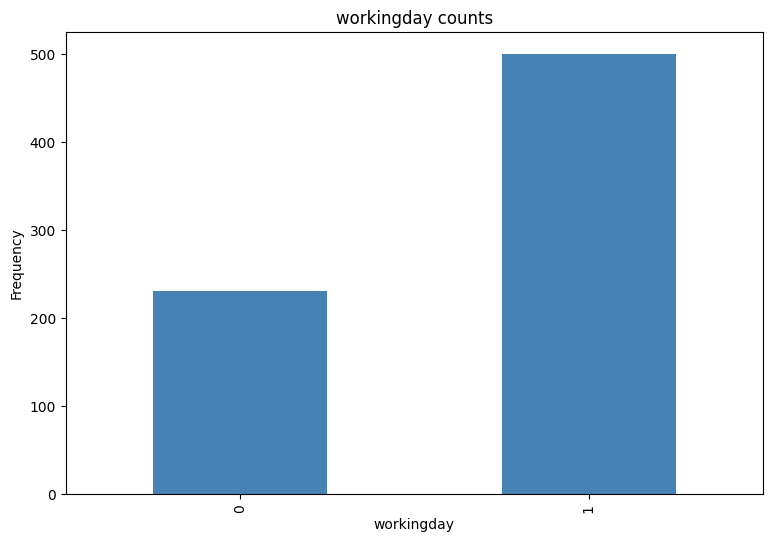

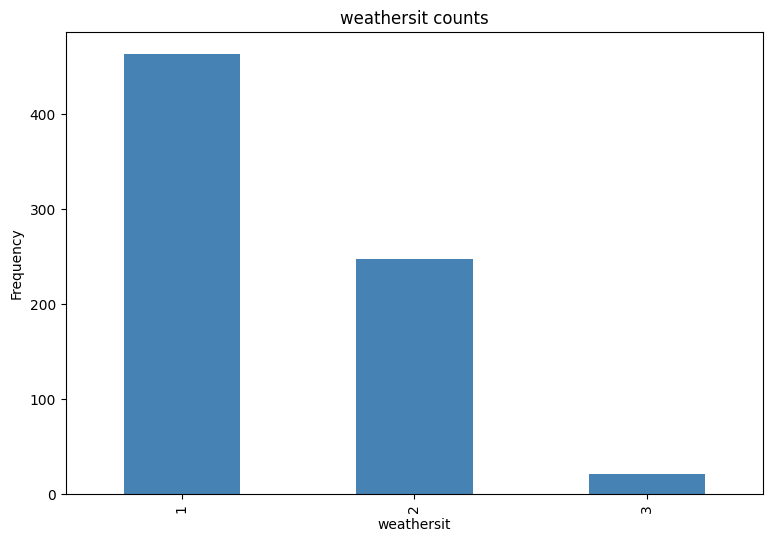

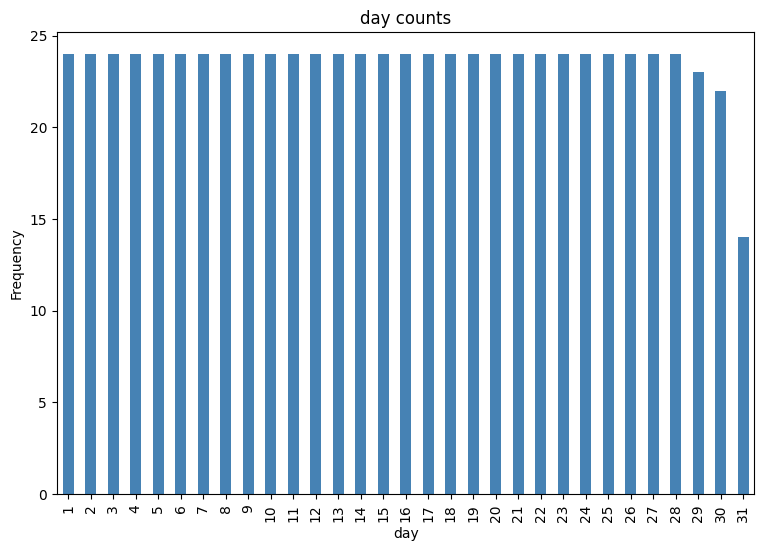

In [37]:
import numpy as np

# Plot Plot Batang untuk setiap jumlah fitur kategoris
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']

for col in categorical_features:
    counts = bike_data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

Banyak fitur kategoris menunjukkan distribusi yang kurang lebih seragam (artinya ada jumlah baris yang kira-kira sama untuk setiap kategori). Pengecualian pada:

**holiday**: Ada lebih sedikit hari yang merupakan hari libur daripada hari yang tidak.

**workingday**: Ada lebih banyak hari kerja daripada hari non-kerja.

**weathersit**: Sebagian besar hari adalah kategori 1 (cerah), dengan kategori 2 (kabut dan awan) yang paling umum berikutnya. Ada relatif sedikit hari kategori 3 (hujan ringan atau salju), dan tidak ada hari kategori 4 (hujan lebat, hujan es, atau kabut) sama sekali.

Sekarang setelah kita mengetahui sesuatu tentang distribusi data di kolom kita, kita dapat mulai mencari hubungan antara fitur dan label persewaan yang ingin kita prediksi.

Untuk fitur numerik, kita dapat membuat plot scatter yang menunjukkan persimpangan nilai fitur (temp, atemp, hum, dan windspeed) dan label. Kita juga dapat menghitung statistik korelasi untuk mengukur hubungan yang tampak..

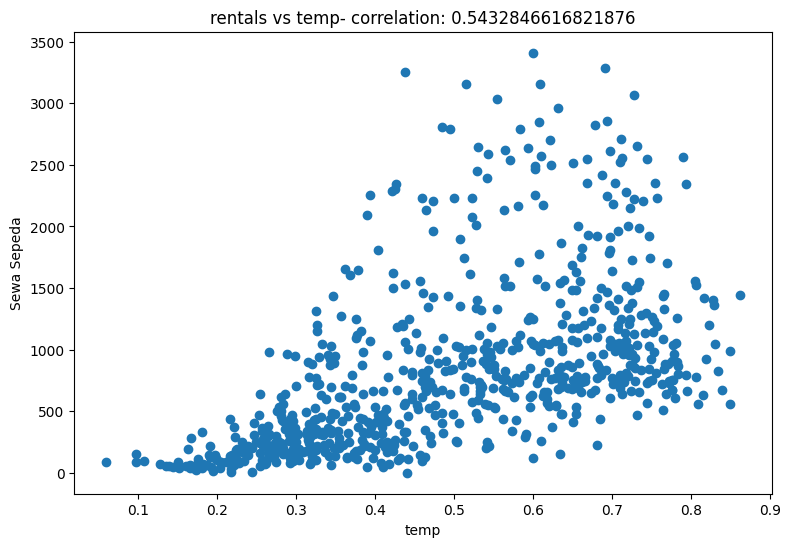

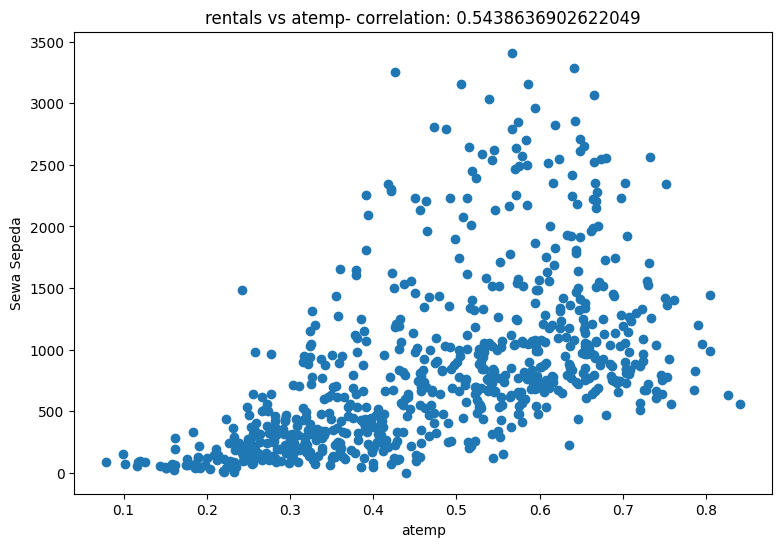

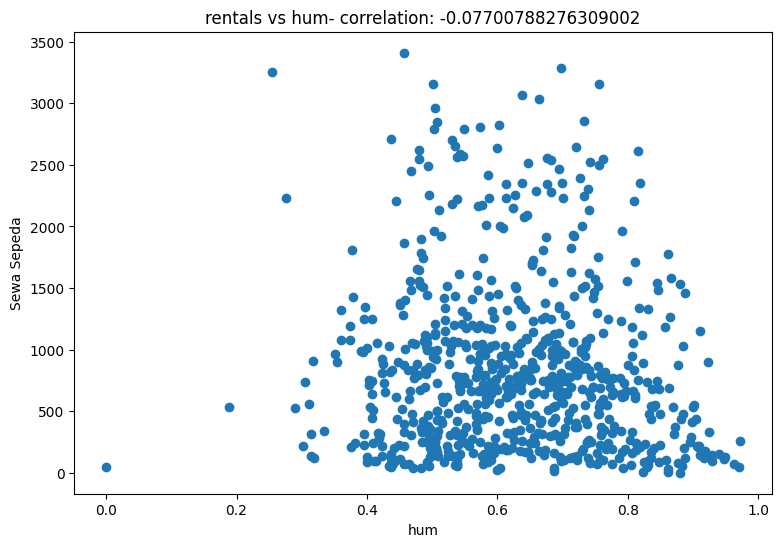

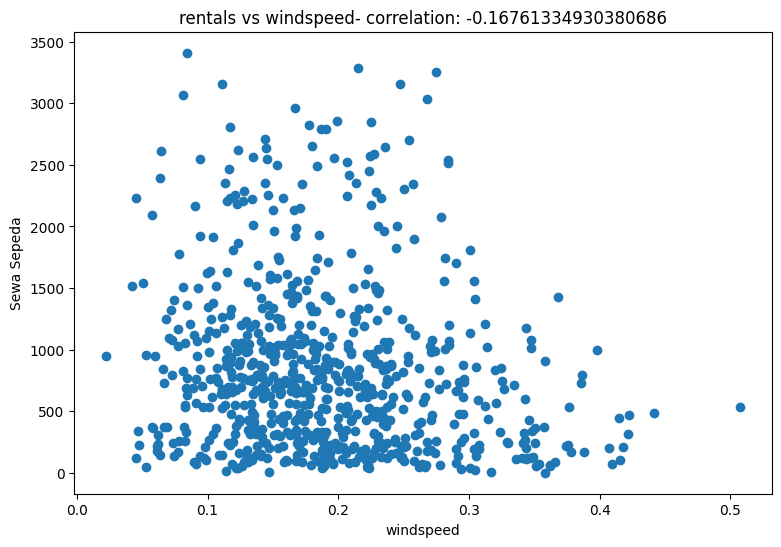

In [38]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    label = bike_data['rentals']

    # masukkan parameter .corr dari library pandas untuk analisis korelasi
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Sewa Sepeda')
    ax.set_title('rentals vs ' + col + '- correlation: ' + str(correlation))
plt.show()

Hasilnya tidak konklusif, tetapi jika ingin melihat lebih dekat pada plot scatter untuk temp dan atemp, Kita dapat melihat tren diagonal samar yang menunjukkan bahwa jumlah sewa yang lebih tinggi cenderung bertepatan dengan suhu yang lebih tinggi dengan nilai korelasi yang cukup kuat yaitu > 0,5. Sebaliknya, plot untuk hum dan windspeed menunjukkan korelasi negatif atau bergerak berlawanan arah yang menunjukkan bahwa lebih sedikit persewaan pada hari dengan kelembaban tinggi atau kecepatan angin tinggi.

Sekarang mari kita bandingkan fitur kategoris dengan label (bike rentals). kita akan melakukan ini dengan membuat plot kotak yang menunjukkan distribusi jumlah sewa untuk setiap kategori.

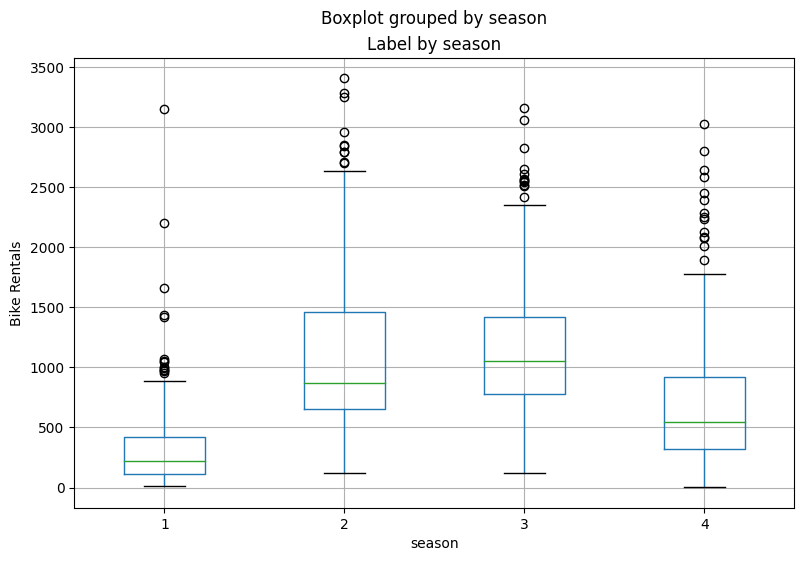

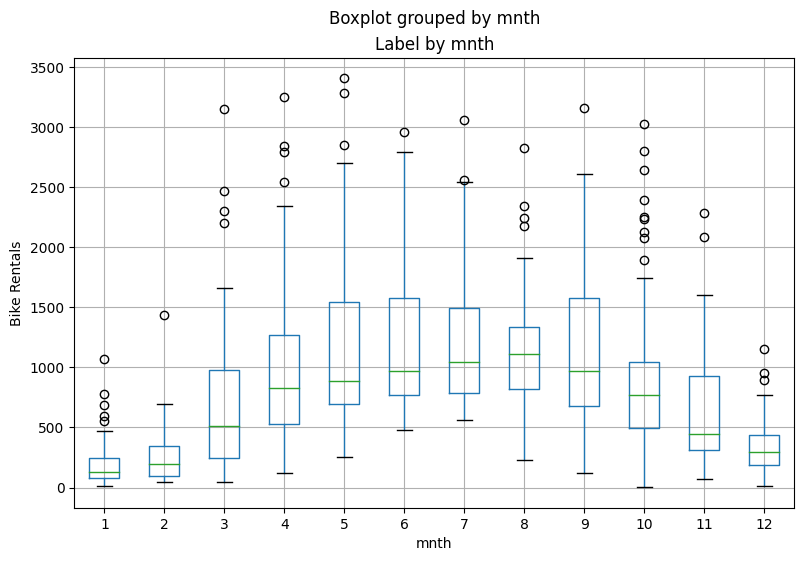

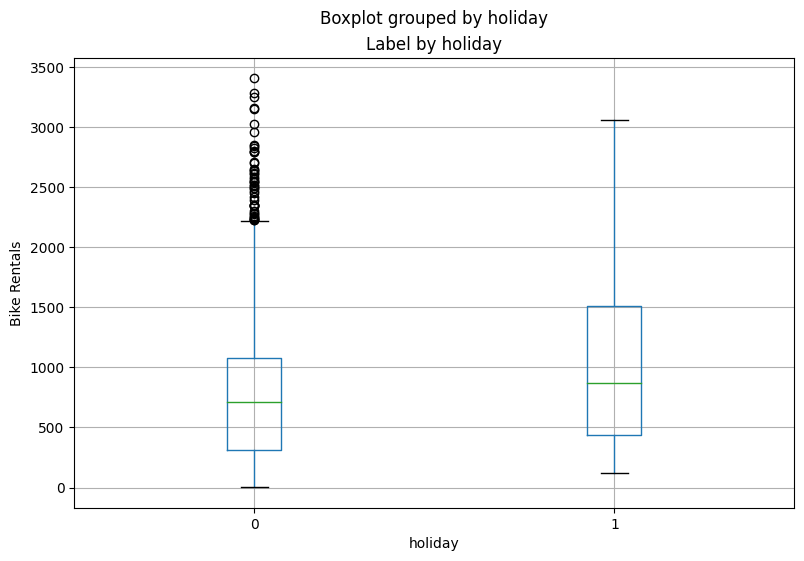

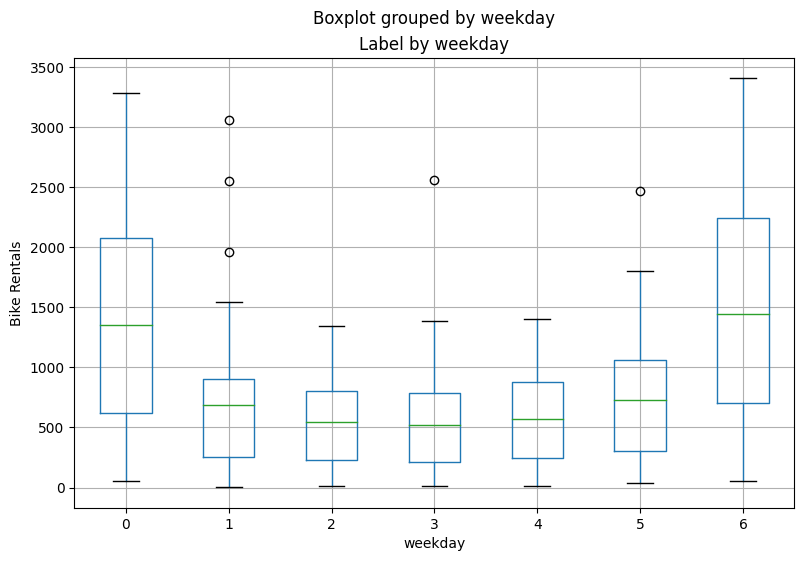

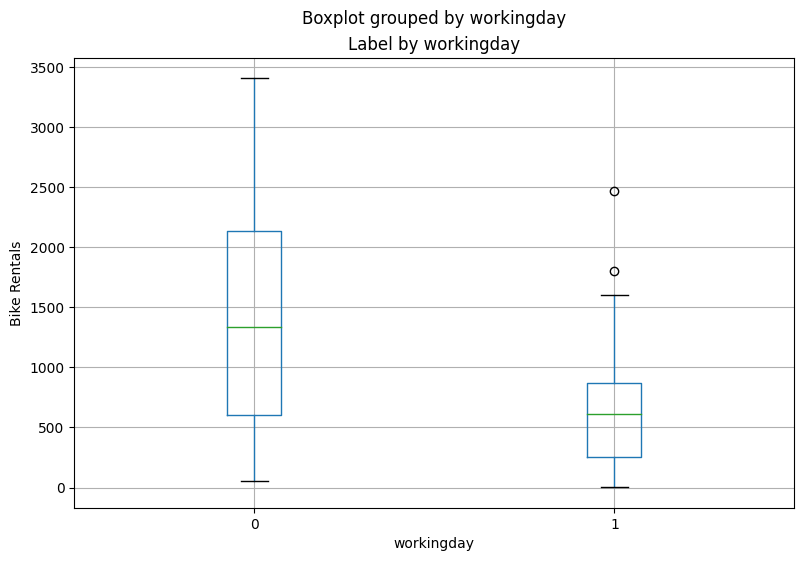

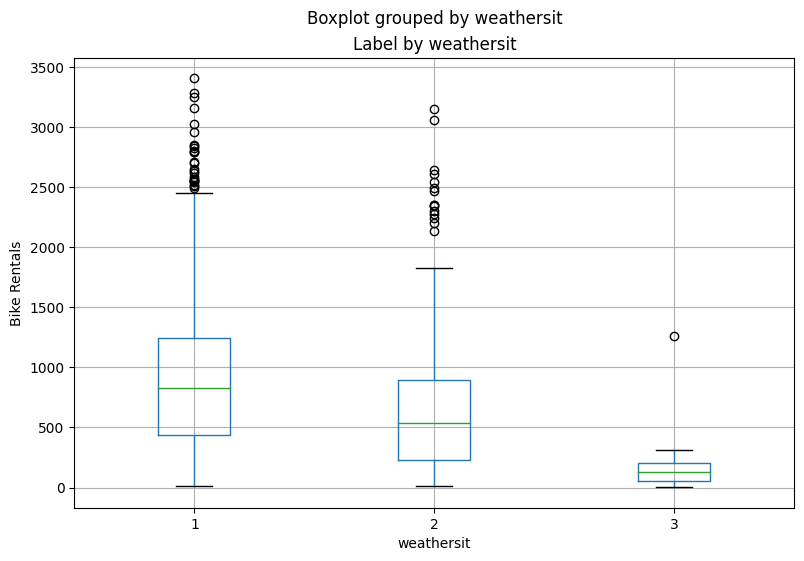

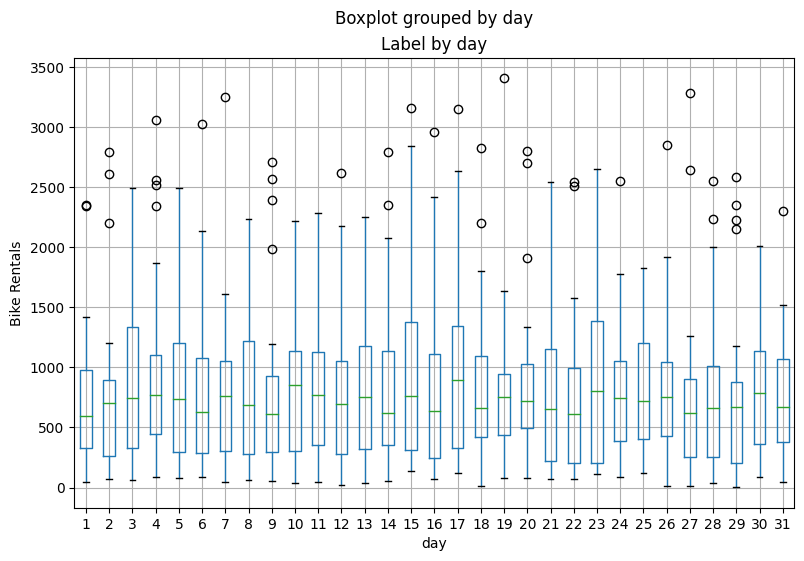

In [39]:
# Plot BoxPlot untuk label dengan setiap fitur kategoris
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike_data.boxplot(column = 'rentals', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Bike Rentals")
plt.show()

Plot menunjukkan beberapa varians dalam hubungan antara beberapa nilai kategori dan persewaan. Misalnya, ada perbedaan yang jelas dalam distribusi sewa pada akhir pekan (hari kerja 0 atau 6) dan selama minggu kerja (hari kerja 1 hingga 5). Demikian pula, ada perbedaan mencolok untuk kategori liburan dan hari kerja. Ada tren nyata yang menunjukkan distribusi sewa yang berbeda di bulan-bulan musim semi dan musim panas dibandingkan dengan bulan-bulan musim dingin dan musim gugur. Kategori weathersit juga tampaknya membuat perbedaan dalam distribusi sewa. Fitur hari demi hari dalam sebulan menunjukkan sedikit variasi, menunjukkan bahwa itu mungkin tidak memprediksi jumlah penyewaan.

## Membuat Model Regresi

Sekarang setelah kita memuat data, saatnya menggunakannya untuk melatih model regresi yang menggunakan fitur yang telah kita identifikasi sebagai berpotensi prediktif untuk memprediksi label **rentals**.  Hal pertama yang perlu kita lakukan adalah memisahkan fitur yang ingin kita gunakan untuk melatih model dari label yang kita inginkan untuk diprediksi.

In [40]:
# Pemisahan Fitur dan label
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[1.        1.        0.        6.        0.        2.        0.344167
  0.363625  0.805833  0.160446 ]
 [1.        1.        0.        0.        0.        2.        0.363478
  0.353739  0.696087  0.248539 ]
 [1.        1.        0.        1.        1.        1.        0.196364
  0.189405  0.437273  0.248309 ]
 [1.        1.        0.        2.        1.        1.        0.2
  0.212122  0.590435  0.160296 ]
 [1.        1.        0.        3.        1.        1.        0.226957
  0.22927   0.436957  0.1869   ]
 [1.        1.        0.        4.        1.        1.        0.204348
  0.233209  0.518261  0.0895652]
 [1.        1.        0.        5.        1.        2.        0.196522
  0.208839  0.498696  0.168726 ]
 [1.        1.        0.        6.        0.        2.        0.165
  0.162254  0.535833  0.266804 ]
 [1.        1.        0.        0.        0.        1.        0.138333
  0.116175  0.434167  0.36195  ]
 [1.        1.        0.        1.        1.        1.        

Setelah memisahkan himpunan data, kita sekarang memiliki array numpy bernama **X** yang berisi fitur, dan **y** yang berisi label ataua jumlah sewa (rentals).

Kita *bisa* melatih model menggunakan semua data; tetapi itu adalah praktik umum dalam supervised learning untuk membagi data menjadi dua subset; set (biasanya lebih besar) untuk melatih model, dan set "tahan" yang lebih kecil untuk memvalidasi model terlatih. Hal ini memungkinkan kita untuk mengevaluasi seberapa baik kinerja model saat digunakan dengan himpunan data validasi dengan membandingkan label yang diprediksi dengan label yang diketahui. Penting untuk membagi data *secara acak* (daripada mengatakan, mengambil 70% data pertama untuk pelatihan dan menyimpan sisanya untuk validasi). Ini membantu memastikan bahwa kedua subset data sebanding secara statistik (jadi kita memvalidasi model dengan data yang memiliki distribusi statistik yang serupa dengan data yang dilatih).


Untuk membagi data secara acak, kita akan menggunakan fungsi **train_test_split** di library **scikit-learn**. Library ini adalah salah satu paket Machine Learning yang paling banyak digunakan untuk Python.

In [41]:
from sklearn.model_selection import train_test_split

# Pemisahan data 70%-30% menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 511 rows
Test Set: 220 rows


Sekarang kita memiliki empat himpunan data berikut:

- **X_train**: Nilai fitur yang akan kita gunakan untuk melatih model
- **y_train**: Label yang sesuai akan kita gunakan untuk melatih model
- **X_test**: Nilai fitur yang akan kita gunakan untuk memvalidasi model
- **y_test**: Label yang sesuai akan kita gunakan untuk memvalidasi model

Sekarang kita siap untuk melatih model dengan menyesuaikan algoritma regresi yang sesuai dengan data pelatihan. Kita akan menggunakan algoritma *linear regression*, titik awal umum untuk regresi yang bekerja dengan mencoba menemukan hubungan linier antara nilai *X* dan label *y*. Model yang dihasilkan adalah fungsi yang secara konseptual mendefinisikan garis di mana setiap kombinasi nilai X dan y yang mungkin berpotongan.

Dalam Scikit-Learn, algoritma pelatihan dienkapsulasi dalam *estimator*, dan dalam hal ini kita akan menggunakan estimator **LinearRegression** untuk melatih model regresi linier.

In [42]:
# Jalankan model
from sklearn.linear_model import LinearRegression

# Menyesuaikan model regresi linier pada training set
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


### Evaluasi Trained Model

Sekarang setelah kita melatih model, kita dapat menggunakannya untuk memprediksi jumlah sewa untuk fitur yang kita tahan dalam himpunan data validasi kita. Kemudian kita dapat membandingkan prediksi ini dengan nilai label aktual untuk mengevaluasi seberapa baik (atau tidak!) model tersebut bekerja.

In [43]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [1896. 1184. 1007.  -28.  314.  385.  475.  590. 1476.  -22.]
Actual labels   :  [2418  754  222   47  244  145  240  555 3252   38]


Membandingkan setiap prediksi dengan nilai aktual "kebenaran dasar" yang sesuai bukanlah cara yang sangat efisien untuk menentukan seberapa baik model memprediksi. Mari kita lihat apakah kita bisa mendapatkan indikasi yang lebih baik dengan memvisualisasikan plot sebar yang membandingkan prediksi dengan label yang sebenarnya. kita juga akan melapisi garis tren untuk mendapatkan gambaran umum tentang seberapa baik label yang diprediksi selaras dengan label yang sebenarnya.

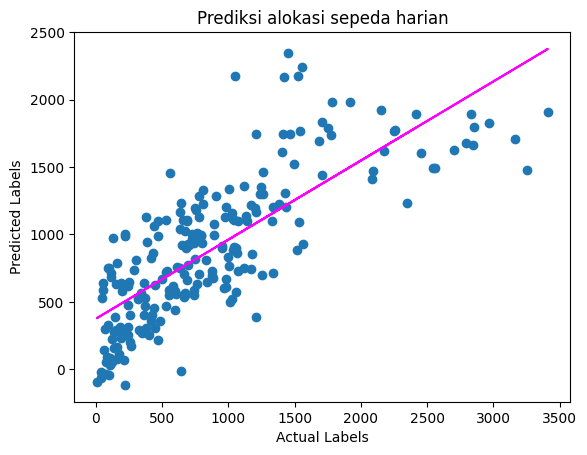

In [44]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Prediksi alokasi sepeda harian')
# overlay garis regresi
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Ada tren diagonal yang pasti dan perpotongan antara nilai prediksi dengan nilai aktual yang mengikuti jalur garis tren; tetapi ada cukup banyak perbedaan antara fungsi ideal yang diwakili oleh garis dan hasilnya. Varians ini mewakili *sisa* model - dengan kata lain, perbedaan antara label yang diprediksi saat model menerapkan koefisien yang dipelajarinya selama pelatihan ke data validasi, dan nilai sebenarnya dari label validasi. Residu ini ketika dievaluasi dari data validasi menunjukkan tingkat *eror* ketika model digunakan dengan data baru yang labelnya tidak diketahui.
 
Kita dapat mengukur residu dengan menghitung sejumlah metrik evaluasi yang umum digunakan. kita akan fokus pada tiga berikut:
 
- **Mean Square Error (MSE)**: Rata-rata perbedaan kuadrat antara nilai prediksi dan nilai aktual. Ini menghasilkan metrik relatif di mana semakin kecil nilainya, semakin baik kecocokan model
- **Root Mean Square Error (RMSE)**: Akar kuadrat dari MSE. Ini menghasilkan metrik absolut dalam unit yang sama dengan label (dalam hal ini, jumlah persewaan). Semakin kecil nilainya, semakin baik modelnya (dalam arti sederhana, ini mewakili jumlah rata-rata rental yang prediksinya salah!)
- **Koefisien Determinasi (biasanya dikenal sebagai *R-kuadrat* atau R<sup> 2</sup>**): Metrik relatif di mana semakin tinggi nilainya, semakin baik kecocokan model. Intinya, metrik ini mewakili seberapa besar varians antara nilai label yang diprediksi dan aktual yang dapat dijelaskan oleh model.
 
Mari gunakan Scikit-Learn untuk menghitung metrik ini untuk model kita, berdasarkan prediksi yang dihasilkan untuk data validasi.



In [45]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 201972.55947035592
RMSE: 449.4135728595165
R2: 0.6040454736919191


Jadi sekarang kita telah mengukur kemampuan model untuk memprediksi jumlah penyewaan harian sepeda.